In [66]:
# My Modules
import sys
sys.path.append('../')
from src import datahandler

###### Data tools
from math import sqrt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

###### Preprocessing tools
from sklearn.utils import all_estimators
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

###### Regression Models 
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

##### Measuring models
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#from sklearn.ensemble import *
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier


In [67]:
data = pd.read_csv('../OUTPUT/numerical_features_qualify_depth.csv')
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,depth_categories
0,1.21,0,4,4.5,63.0,57.0,6.73,6.70,4.23,6134,0.2
1,0.28,2,0,2.5,64.0,56.0,4.14,4.17,2.66,532,0.2
2,0.42,1,2,4.0,61.2,58.0,4.86,4.82,2.96,1103,0.0
3,0.26,0,4,0.0,61.1,57.0,4.16,4.12,2.53,600,0.0
4,1.10,3,3,6.0,63.4,57.0,6.52,6.55,4.14,4997,0.2


# Preparing variables `X` and `y`

In [68]:
Xunprocessed = data.drop(columns='price')
yunprocessed = data.price
X= Xunprocessed
y= yunprocessed

### Quick Visualization

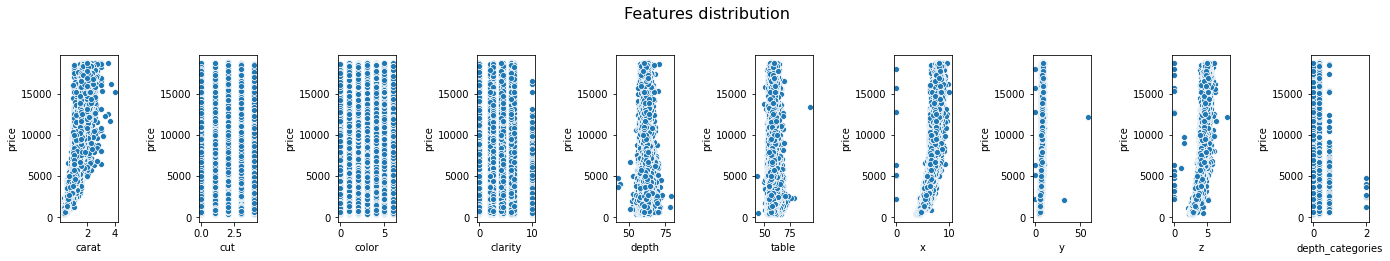

In [69]:
columns = X.columns   # Use this variable to specify the features to visaualize.
datahandler.visualize_data(X[columns],y)

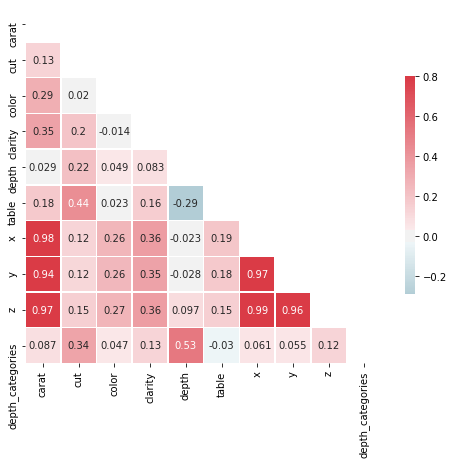

In [5]:
datahandler.corr_matrix(X)

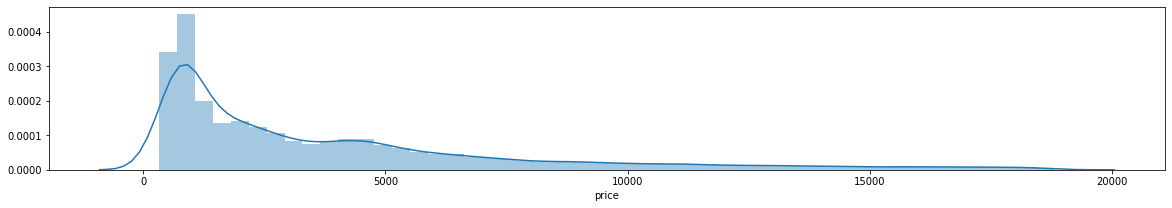

In [6]:
plt.figure(figsize=(20,3))
sns.distplot(y)

# Pre-processing data pipeline

`sklearn estimators`
![sklearn estimators](https://scikit-learn.org/stable/_static/ml_map.png)


Links to more documentation: 
 - [`sklearn.pipeline`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline)
 - `Estimator class`
     - `myestimator.get_params`

In [7]:
# Feeling lucky?
Lucky = False
# We could check all possible estimators in the sklearn library:
if Lucky: all_estimators(type_filter='regressor')

In [8]:
pipeline = [
    StandardScaler(),
    Normalizer(),
    
]

tr = make_pipeline(*pipeline)

# We'll use this both four our training and final predictions
Xprocessed = tr.fit_transform(X)

StandardScaler().get_params()

Normalizer().get_params()

LinearRegression().get_params()

## Train, test, split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xprocessed, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32276, 10) (8069, 10) (32276,) (8069,)


# Define my models

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

models = {
    'linear_regression':LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None),
    'linearSVR': LinearSVR(),
    #'NuSVR':NuSVR,
    #'SVR':SVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "ExtraTreeRegressor":ExtraTreeRegressor(),
    #"GaussianProcessRegressor":GaussianProcessRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "GradientBoostingRegressorP":GradientBoostingRegressor(n_estimators=1000, random_state=1),
    "HistGradientBoostingRegressor":HistGradientBoostingRegressor(max_bins=255, loss='least_squares',
                                                                  max_iter=88,
                                                                  max_leaf_nodes=25,
                                                                  random_state=1,
                                                                  scoring="neg_root_mean_squared_error"),
    
}

# 🔢️  Grid-Search Cross-Validation ♨️

Select a model, and set up a parametrs_grid. Iterate over all the possible mixes of parameters, and save the fitted model 

In [45]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV

parameters_grid = {#'loss':['ls', 'lad'],
                  #'n_estimators':[150,100],
                  'n_estimators':[1100],
                # 'learning_rate':[0.1, 0.2],
               #   'max_bins':[255],
                 # 'max_iter':[86,87,88],
                 # 'max_leaf_nodes':[2,5,8,10,11,12,13,15,16,17,25,26,27],
               #   'scoring':['neg_root_mean_squared_error'],
                  'random_state':[1]
                  }

In [37]:
# Select my model
my_model = models['GradientBoostingRegressor']

# Fit my model with GridSearchCV
reg = GridSearchCV(my_model, parameters_grid, verbose=5,
                   scoring='neg_mean_squared_error'
                  ).fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] n_estimators=1000, random_state=1 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, random_state=1, score=-434873.893, total= 1.8min
[CV] n_estimators=1000, random_state=1 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV]  n_estimators=1000, random_state=1, score=-380724.988, total= 1.8min
[CV] n_estimators=1000, random_state=1 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.6min remaining:    0.0s


[CV]  n_estimators=1000, random_state=1, score=-387075.432, total= 2.0min
[CV] n_estimators=1000, random_state=1 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  5.6min remaining:    0.0s


[CV]  n_estimators=1000, random_state=1, score=-407114.662, total= 2.5min
[CV] n_estimators=1000, random_state=1 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  8.0min remaining:    0.0s


[CV]  n_estimators=1000, random_state=1, score=-378527.642, total= 2.3min
[CV] n_estimators=1100, random_state=1 ...............................
[CV]  n_estimators=1100, random_state=1, score=-432630.858, total= 2.2min
[CV] n_estimators=1100, random_state=1 ...............................
[CV]  n_estimators=1100, random_state=1, score=-376700.408, total= 2.5min
[CV] n_estimators=1100, random_state=1 ...............................
[CV]  n_estimators=1100, random_state=1, score=-385440.081, total= 2.4min
[CV] n_estimators=1100, random_state=1 ...............................
[CV]  n_estimators=1100, random_state=1, score=-405587.815, total= 2.5min
[CV] n_estimators=1100, random_state=1 ...............................
[CV]  n_estimators=1100, random_state=1, score=-377018.019, total= 2.4min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 22.4min finished


In [40]:
reg.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [41]:
#I can use my fitted model to predict any given set of X values
reg.predict(X).shape

(40345,)

# Compare the REAL sale price (GROUND TRUTH) with our prediction


## Measure RMSE

In [42]:
sqrt(mean_squared_error(y_test,  reg.predict(X_test)))

627.5397187635043


    # #############################################################################
    # Plot feature importance
    feature_importance = reg.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, boston.feature_names[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

# Train again the model, but using all the X data, before sending a prediction to kaggle

In [46]:
reg = GridSearchCV(my_model, parameters_grid, verbose=10,
                   scoring='neg_mean_squared_error'
                  ).fit(Xunprocessed, yunprocessed)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] n_estimators=1100, random_state=1 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1100, random_state=1, score=-278502.256, total=  52.0s
[CV] n_estimators=1100, random_state=1 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   52.0s remaining:    0.0s


[CV]  n_estimators=1100, random_state=1, score=-303030.516, total=  52.2s
[CV] n_estimators=1100, random_state=1 ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.7min remaining:    0.0s


[CV]  n_estimators=1100, random_state=1, score=-289553.792, total=  47.8s
[CV] n_estimators=1100, random_state=1 ...............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.5min remaining:    0.0s


[CV]  n_estimators=1100, random_state=1, score=-308929.798, total=  53.2s
[CV] n_estimators=1100, random_state=1 ...............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.4min remaining:    0.0s


[CV]  n_estimators=1100, random_state=1, score=-306614.651, total=  53.1s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.3min finished


# Take this new regression model, and use it to predict the values of `y` in the kaggle dataset

In [56]:
'h'

'h'

In [57]:
X_competition = pd.read_csv(f'../INPUT/diamonds_test.csv')#.drop(columns='Unnamed: 0')
X_competition.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,0,0.30,Ideal,H,SI2,60.0,56.0,4.41,4.43,2.65
1,1,0.34,Ideal,D,IF,62.1,57.0,4.52,4.46,2.79
2,2,1.57,Very Good,I,VS2,60.3,58.0,7.58,7.55,4.56


In [58]:
# Remove outlier prices:
#X_competition = X_competition[X_competition.price < 10000]

### Reuse my data processing pipeline to make this `test data` look like the data I fitted my model with


In [59]:
X_competition_processed = datahandler.use_my_numeric_scales(X_competition)
X_competition_processed['depth_categories'] = X_competition_processed.depth
X_competition_processed['depth_categories'] = X_competition_processed.depth_categories.apply(datahandler.depth_qualifyer)
X_competition_processed.drop(columns="Unnamed: 0", inplace=True)
X_competition_processed.head(3)

,carat,cut,color,clarity,depth,table,x,y,z,depth_categories
0,0.30,0,4,6.5,60.0,56.0,4.41,4.43,2.65,0.0
1,0.34,0,0,0.0,62.1,57.0,4.52,4.46,2.79,0.2
2,1.57,2,5,4.5,60.3,58.0,7.58,7.55,4.56,0.0


In [61]:
reg.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
my_prediction = reg.predict(X_competition_processed)

In [63]:
df = pd.DataFrame(my_prediction)
df = df.reset_index()
df.columns = ['id', 'price']
df.head()

,id,price
0,0,446.350660
1,1,1985.836578
2,2,9463.299784
3,3,522.318609
4,4,9389.231424


In [64]:
df.shape

(13449, 2)

In [65]:
df.to_csv(f'../OUTPUT/my_prediction.csv', columns=['id','price'], index_label=False,index=False)

In [61]:
break

SyntaxError: 'break' outside loop (<ipython-input-61-6aaf1f276005>, line 4)

# Predict using all the `train data`

### Calculate accracy scores for my GridSearchCV's top_model, and compare it with other trained models in my dict

In [ ]:
"""
TODO: scoring of cross validation score
"""
print(f"(my current `top_model`:   {top_model})")


In [35]:
scores = cross_val_score(reg, Xunprocessed, yunprocessed, cv=10, verbose=2, scoring='neg_mean_squared_error')
print(f"   Xunprocessed   RMSE: {sqrt(np.mean(abs(scores)))}   MSE={np.mean(abs(scores))}    -- ")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=200, random_state=1 ................................
[CV]  n_estimators=200, random_state=1, score=-378176.591, total=   6.8s
[CV] n_estimators=200, random_state=1 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


[CV]  n_estimators=200, random_state=1, score=-339771.738, total=   6.8s
[CV] n_estimators=200, random_state=1 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.5s remaining:    0.0s


[CV]  n_estimators=200, random_state=1, score=-355587.560, total=   6.7s
[CV] n_estimators=200, random_state=1 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.2s remaining:    0.0s


[CV]  n_estimators=200, random_state=1, score=-328259.674, total=   7.0s
[CV] n_estimators=200, random_state=1 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   27.2s remaining:    0.0s


[CV]  n_estimators=200, random_state=1, score=-360044.310, total=   7.1s
[CV] n_estimators=300, random_state=1 ................................
[CV]  n_estimators=300, random_state=1, score=-356762.089, total=  10.8s
[CV] n_estimators=300, random_state=1 ................................
[CV]  n_estimators=300, random_state=1, score=-320186.711, total=   9.9s
[CV] n_estimators=300, random_state=1 ................................


KeyboardInterrupt: 

In [ ]:
sqrt(abs(scores).mean())

In [ ]:
scores = cross_val_score(top_model, Xprocessed, y, cv=10,  verbose=2, scoring='neg_mean_squared_error')
print(f"   Xprocessed     RMSE: {sqrt(np.mean(scores))}   MSE={np.mean(scores)}   <-- ")

In [ ]:
sqrt(abs(scores).mean())

In [ ]:
print(sqrt(389068.2499853767))

print(sqrt(572360.359867032))

# How do I cross_val_score the correct data ? 


In [ ]:
for name, model in models.items():
    print(f"({name})")
    scores = cross_val_score(model, Xunprocessed, yunprocessed, cv=10, scoring='neg_mean_squared_error')
    print(f"   X    acccuracy={np.mean(scores)}")
    scores = cross_val_score(model, Xprocessed, y, cv=10, scoring='neg_mean_squared_error')
    print(f"   Xpr  acccuracy={np.mean(scores)}")

In [ ]:
# Make a sound that lets me know when I can check the new scores :)
makesound()

# Prepare for our Final Prediction

Guessing the sale price of the unlabeled diamonds, using our `top_model`, fitting it to all of `X`, and finally using its `predict_` method on the `X_competition`

    # Choose the correct columns to fit the model
    def select_features(dataframe):
        data = dataframe.copy()
        data.drop(columns='price', inplace=True)
        my_features = data.columns
        return my_features
    my_features = select_features(data_input_states['numeric_train'])
    my_features